# <font color='#29487d'> TOPIC </font>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from scipy import optimize
import sys
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import math

### <font color='#29487d'> Linear Regression Algorithm</font>

In [2]:
## X, y = (examples, features)
## Theta = (thetas,)
class LinearRegression():
    def __init__(self, reg_lambda = 0, eta = 0.01, niter=1500,):
        self.reg_lambda = reg_lambda
        self.eta = eta
        self.niter = niter
        self.theta = None
        self.cost = []
###################  Train the model  ##################
    def fit(self,X, y):
        X = np.concatenate((np.ones((X.shape[0],1)), X),1)
        reg_lambda = self.reg_lambda
        m = len(y)
###################  Compute Cost Function for Linear Regression #################
        def _cost(theta):
            J = 0
            theta = theta.reshape(theta.shape[0],1) 
            reg_penalty = reg_lambda/(2/m) * (theta[1:] ** 2).sum()
            J = float(1)/(2*m) * ((X.dot(theta) - y) ** 2).sum() +  reg_penalty
            return J
        def _grad(theta):
            self.cost = []
            reg_penalty = reg_lambda/(m) * (theta[1:]).sum()
            theta = theta.reshape(theta.shape[0],1) 
            grad = 1/(m) * np.transpose(X).dot((X.dot(theta).reshape(y.shape[0],y.shape[1]) - y)) +  reg_penalty
            grad.reshape(grad.shape[0],)
            return grad
        
################### Broyden-Fletcher-Goldfarb-Shanno Algorithm ###################
        ## use this algorithm to converge gradient
        #theta = np.zeros((X.shape[1],1))
        theta = np.random.rand(X.shape[1],1)
        self.cost.append(_cost(theta))

        for i in range(0,self.niter+1):
            grad = _grad(theta)
            theta = theta - self.eta * grad
            self.cost.append(_cost(theta))
            print('\rIteration:  %d || Cost : %f'  % (i , _cost(theta)), flush=True,end='')
#         [xopt, fopt, gopt, Bopt, func_calls, grad_calls, warnflg] = optimize.fmin_cg(f=_cost,
#                                                                                        x0=init_theta,
#                                                                                        fprime=_grad,
#                                                                                        disp=True,
#                                                                                        maxiter = self.niter,
#                                                                                        full_output=True,
#                                                                                        retall=False)
#         #xopt = optimize.minimize(fun=_cost, x0=init_theta, method='CG', jac=_grad)
        print('\nTheta is: ', end='')
        for i in range(0, theta.shape[0]):
            print('%f, ' % theta[i], end='')
        print()
        self.theta = theta
        
###################  Predict the New Data  ##################
    def predict(self,newData):
        if len(newData.shape) == 1:
            newData = newData.reshape(newData.shape[0],1)
        newData = np.concatenate((np.ones((newData.shape[0],1)), newData),1)
        return newData.dot(self.theta)
    def getCost(self):
        return self.cost
    def set_eta(self, eta):
        self.cost = []
        self.eta = eta
    def set_niter(self, niter):
        self.niter=niter
    def set_panelty(self, p):
        self.reg_lambda = p
    def get_theta(self):
        return self.theta

# Introduce to the Features
 - ### Pclass: Ticket class
 - ### Sex: sex
 - ### Sex: 
    - #### 1 = Male 
    - #### 0 = Female
 - ### SibSp: Number of siblings/spouses aboard the Titanic
 - ### Parch: Number of parents/children aboard the Titanic
 - ### Ticket: Ticket number
 - ### Fare： Passenger fare
 - ### Cabin: Cabin number
 - ### Embarked: Port of Embarkation

In [3]:
df = pd.read_csv('./train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
list(df.columns.values)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [6]:
# re-range the table
cols = df.columns.tolist()
cols = cols[1:] + cols[:1]
df = df[cols]

In [7]:
cols

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'PassengerId']

In [8]:
# Total rows in the data
df.shape[0]

891

In [9]:
# We have to convert the male to the dummy feature
# The Sex columns will be is male or not.

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_copy = df.values
df_copy[:,3] = le.fit_transform(df_copy[:,3])

df = pd.DataFrame(df_copy, columns=cols)

# Since name

In [10]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId
0,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.25,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C,2
2,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.925,NaN,S,3
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1,C123,S,4
4,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.05,NaN,S,5


In [11]:
print("Total rows that contains NaN : %d" % (df.shape[0] - df.dropna().shape[0]))
print("The percentage that contains NaN data : %f"% ((df.shape[0] - df.dropna().shape[0])/df.shape[0]))

Total rows that contains NaN : 708
The percentage that contains NaN data : 0.794613


### The Survival distribution

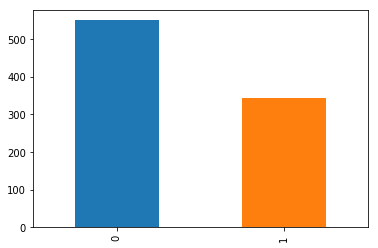

In [12]:
df.Survived.value_counts().plot(kind='bar')

#### => WE can see we dont have any skewed class

### The relation between Age and survival

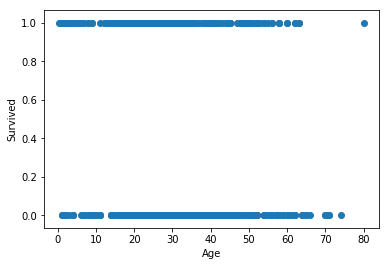

In [13]:
plt.scatter(df['Age'], df['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

 ## <font color='#29487d'> Check the Null Value</font>

### <font color='#5b7cbb'>Count  How Many Rows have the NaN ( Null ) Values</font>

In [14]:
# We can see how many datas are available (Not NaN)
df.count()

Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
PassengerId    891
dtype: int64

In [15]:
# all the rows that has the null value
df[df.isnull().any(axis=1)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId
0,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.25,NaN,S,1
2,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.925,NaN,S,3
4,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.05,NaN,S,5
5,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,6
7,0,3,"Palsson, Master. Gosta Leonard",1,2,3,1,349909,21.075,NaN,S,8


In [16]:
# List the number of NaN data in each columns
null_columns=df.columns[df.isnull().any()]
null_columns

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [17]:
df[null_columns].isnull().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

In [18]:
# Since the name apparently is not related to the passenger surviv or not. We drop the 'Name' column
df = df.drop('Name', axis = 1)

Since the ticket doesnt have any null value <br>
=> Every Passanger has the ticket, so survived or not is not related to the ticket<br>

** Everyone has the same state: has ticket **<br>

so we drop the tick column

In [19]:
df = df.drop('Ticket', axis = 1)

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,PassengerId
0,0,3,1,22,1,0,7.25,NaN,S,1
1,1,1,0,38,1,0,71.2833,C85,C,2
2,1,3,0,26,0,0,7.925,NaN,S,3
3,1,1,0,35,1,0,53.1,C123,S,4
4,0,3,1,35,0,0,8.05,NaN,S,5


The Cabin only has the 204 not NaN, so we have to consider that do we really need Cabin ? <br><br>
We drop the are carbin value here first. After we can see the accuracy of this data <br><br>

In [21]:
df = df.drop('Cabin', axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PassengerId
0,0,3,1,22,1,0,7.25,S,1
1,1,1,0,38,1,0,71.2833,C,2
2,1,3,0,26,0,0,7.925,S,3
3,1,1,0,35,1,0,53.1,S,4
4,0,3,1,35,0,0,8.05,S,5


In [22]:
cols = df.columns.tolist()

In [23]:
df = df.dropna(subset=['Embarked'])  
df.count()

Survived       889
Pclass         889
Sex            889
Age            712
SibSp          889
Parch          889
Fare           889
Embarked       889
PassengerId    889
dtype: int64

### See the relation between Embarked and Suvival rate

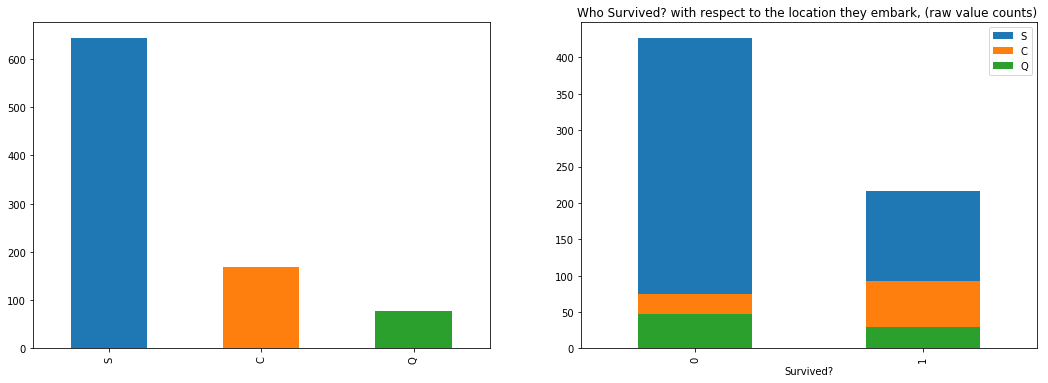

In [24]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
df.Embarked.value_counts().plot(kind='bar')

ax2 = fig.add_subplot(122)
df.Survived[df.Embarked == 'S'].value_counts().sort_index().plot(kind='bar', color='#1f77b4',label = 'S')
df.Survived[df.Embarked == 'C'].value_counts().sort_index().plot(kind='bar', color='#ff7f0e', label='C')
df.Survived[df.Embarked == 'Q'].value_counts().sort_index().plot(kind='bar', color='#2ca02c',label = 'Q')
plt.title("Who Survived? with respect to the location they embark, (raw value counts) ")
plt.xlabel('Survived?')
plt.legend(loc='best')

### <font color='#1f77b4'> We can see this class seem reasonable, which equally distribute
<p> We can remain this feature</p>
<p> Because it is classical value, we convert it to the dummy feature</p>

In [25]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [26]:
#so we convert to the dummy feature
le = LabelEncoder()
ohe = OneHotEncoder(categorical_features=['Embarked'])

df_copy = df.values
df_copy[:,7] = le.fit_transform(df_copy[:,7])
a = np.zeros((df_copy.shape[0],1))
b = np.zeros((df_copy.shape[0],1))
c = np.zeros((df_copy.shape[0],1))
for i in range(0, df_copy.shape[0]):
    if df_copy[i,7] == 0:
        a[i] = 1
    elif df_copy[i,7] == 1:
        b[i] = 1
    elif df_copy[i,7] == 2:
        c[i] = 1
    else:
        a[i] = 0
        b[i] = 0
        c[i] = 0
df_copy[:,7] = a[:,0]            
df_copy = np.append(df_copy, b, 1)
df_copy = np.append(df_copy, c, 1)
cols[7] = 'Embarked:C'
cols.append('Embarked:Q')
cols.append('Embarked:S')
df = pd.DataFrame(df_copy, columns=cols)

In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked:C,PassengerId,Embarked:Q,Embarked:S
0,0,3,1,22,1,0,7.25,0,1,0,1
1,1,1,0,38,1,0,71.2833,1,2,0,0
2,1,3,0,26,0,0,7.925,0,3,0,1
3,1,1,0,35,1,0,53.1,0,4,0,1
4,0,3,1,35,0,0,8.05,0,5,0,1


In [28]:
#so we convert to the dummy feature
le = LabelEncoder()
ohe = OneHotEncoder(categorical_features=['Pclass'])

df_copy = df.values
df_copy[:,7] = le.fit_transform(df_copy[:,7])
a = np.zeros((df_copy.shape[0],1))
b = np.zeros((df_copy.shape[0],1))
c = np.zeros((df_copy.shape[0],1))
for i in range(0, df_copy.shape[0]):
    if df_copy[i,7] == 0:
        a[i] = 1
    elif df_copy[i,7] == 1:
        b[i] = 1
    elif df_copy[i,7] == 2:
        c[i] = 1
    else:
        a[i] = 0
        b[i] = 0
        c[i] = 0
df_copy[:,7] = a[:,0]            
df_copy = np.append(df_copy, b, 1)
df_copy = np.append(df_copy, c, 1)
cols[7] = 'Embarked:C'
cols.append('Embarked:Q')
cols.append('Embarked:S')
df = pd.DataFrame(df_copy, columns=cols)

In [1]:
le = LabelEncoder()
ohe = OneHotEncoder(categorical_features=[1])
q = ohe.fit_transform(df_copy)

NameError: name 'LabelEncoder' is not defined

### Since the PassengerID is not important in this dataset

In [ ]:
cols = cols[:8]  + cols[9:]
df = df[cols]

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

### We still have NaN value in Age <br>
#### Let think of something to fix the nan value in Age<br>
#### we can train another model to predict the value for age, so we enter the predict from this model to the missing age value.<br>
#### Here we use decision tree to fill in the NaN value in Age


In [ ]:
x_temp = df[cols[1:]]
c = x_temp.columns.tolist()
c = c[2:] + c[:2]
x_temp = x_temp[c]

In [ ]:
x_temp.head()

In [ ]:
age = x_temp.dropna(subset=['Age'])

In [ ]:
age_NaN = x_temp[x_temp.isnull().any(axis=1)]
age_NaN.head()

In [ ]:
age_x = age.iloc[:,1:]

In [ ]:
age_y = age.iloc[:,0]
age_y = age_y.values.astype('int')
age_y = age_y.reshape(age_y.shape[0],1)
age_y.shape

In [ ]:
age_X = age_x.values.astype('float')
age_X.shape

In [ ]:
a_train, a_test, ay_train, ay_test = train_test_split(age_X, age_y, test_size=0.3, random_state=0)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(a_train, ay_train)

# <font color='#29487d'>We can find the model is underfitting which has high bias, so the cost (error) increase to the infinit</font>
  - <font size='3em'>One possible is that our data has different scale
  <br>
  <br>
  => So we are going to apply the feature scaler (mean normalization)</font>

In [ ]:
age_x.head()

In [ ]:
train_std = np.std(a_train,axis=0)
train_mean = np.mean(a_train,axis=0)
a_train_std = (a_train- train_mean)* (1/train_std)

test_std = np.std(a_test,axis=0)
test_mean = np.mean(a_test,axis=0)
a_test_std = (a_test- test_mean)* (1/test_std)

In [ ]:
lr.fit(a_train_std, ay_train)

<font color='#29487d' size='3em'>We can see the cost decreasing through out the iteration, but not converge yet.
    <br>
    <br>
    Two Possible to solve this problem:
    <ul>
        <li>Need more iteration</li>
        <li>Increase the learning rate</li>
    </ul>
    <br>
    <br>
    <font size='5em'> Decrease the learning rate:</font>
    
</font>

In [ ]:
learning_rate = [3,1,0.9,0.5,0.3,0.1,0.03]
for i in learning_rate:
    print('The result for learning rate: %f'% i)
    lr.set_eta(i)
    lr.fit(a_train_std, ay_train)


<font color='#29487d' size='3em'>
    The learning rate doesnt change to much 
</font>

In [ ]:
lr.set_niter(5000)
lr.fit(a_train_std, ay_train)

## Plot Learning Curve

In [ ]:
def plot_Learning_Curve(set_size,Jtrain,Jtest):
    plt.plot(set_size,np.array(Jtrain))
    plt.plot(set_size,np.array(Jtest))
    plt.legend(['Training Error','Test Error'])
    plt.xlabel('Dataset size')
    plt.ylabel('Error')
    plt.title('Model response to dataset size')
    plt.ylim(0,160)
    plt.show()

In [ ]:
%timeit
Jtrain_age = []
Jtest_age = []
for i in range(1,a_test.shape[0] + 1):
    print('number of subset: %d' % i, flush=True)
    model = LinearRegression()
    model.fit(a_train_std[:i,:], ay_train[:i,])
    theta = model.get_theta()
    a_train_std_t = np.concatenate((np.ones((a_train_std.shape[0],1)), a_train_std),1)
    a_test_std_t = np.concatenate((np.ones((a_test_std.shape[0],1)), a_test_std),1)
    Jtrain_age.append( ((a_train_std_t[:i,:].dot(theta) - ay_train[:i,:]) ** 2).sum() * (1/(2*i)))
    Jtest_age.append(((a_test_std_t[:i,:].dot(theta) - ay_test[:i,:]) ** 2).sum()* (1/(2*i)))

In [ ]:
plot_Learning_Curve( list(range(1,a_test.shape[0] + 1)),Jtrain_age[:a_test.shape[0] + 1], Jtest_age[:a_test.shape[0] + 1])

### We can see that when training size increase. According to the plot of learning curve, the error is too high
### we plot the relationship between age and different feature

In [ ]:
age_col = age_x.columns.tolist()

In [ ]:
fig, axs = plt.subplots(2,4, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=0.5)

axs = axs.ravel()

for i in range(0,len(age_col)):
    axs[i].scatter(df[age_col[i]], df.Age)
    axs[i].set_title(age_col[i])

In [ ]:
plt.scatter(df['Age'], df['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('survival by Age')
plt.show()

### We can see we are hard to predict Age by existing feature and survival does not have obvious relation
### So we simply drop the Age column that contain NaN value

In [ ]:
df = df.dropna(subset=['Age']) 
x = df[cols[1:]]
y = df[cols[0]]
cols = df.columns.tolist()
x.head()

In [ ]:
df.isnull().sum()

## We can see it doesnt contain Null value anymore

# After we finish our preprocessing data, we can begin to predict our survival

# Review the Features we have right now
 - ### Pclass: Ticket class
 - ### Sex: sex
 - ### Sex: 
    - #### 1 = Male 
    - #### 0 = Female
 - ### SibSp: Number of siblings/spouses aboard the Titanic
 - ### Parch: Number of parents/children aboard the Titanic
 - ### Ticket: Ticket number
 - ### Fare： Passenger fare
 - ### Embarked: Port of Embarkation
    - #### C = Cherbourg 
    - #### Q = Queenstown
    - #### s = Southampton 

In [ ]:
x.head()

In [ ]:
x.shape

### As we can see,  We have 712 training data and 9 features in this table

# This is a binary classification problem and the data is not complex
## so we have two choice for this kind of problem:
 - ### Logistic Regression
 - ### Support Vector Machines (with kernal or without kernal)

# Logistic Regression vs Support Vector machine ( a.k.a SVM )
## <p>We will compare this two algorighm first</p>
## <p>n = number of features, m = number of training examples : </p>
- ### <p>If n is large (relative to m)
    - ##### Use logistic regression or SVM without kernel(linear kernel)</p>
- ### <p>If n is small and m is intermediate (n = 1 ~ 1000, m = 1 ~ 10,000),
    - ##### Use SVM with Gaussian Kernel</p>
- ### <p>If n is small and m is large,
    - ##### Create/Add more features, then use logistic kernel or SVM without a kernel</p>

# Neural Network likely to work well for most of these setting
## but many be slower to train and may have huge local optima

In [ ]:
## X, y = (examples, features)
## Theta = (thetas,)
class LogisticRegression():
    def __init__(self, reg_lambda = 0, eta = 0.01, niter=1500):
        self.reg_lambda = reg_lambda
        self.eta = eta
        self.niter = niter
        self.theta = None
        self.cost = []
        self.result = None
        self.m = 0
###################  Train the model  ##################
    def sigmoid(self,z):
        return 1/(1+ math.e ** (-1.0 * z))
    def fit(self,X, y):
        if type(X) == type(pd.DataFrame()):
            X = X.values
        if type(y) == type(pd.DataFrame()) or type(y) is type(pd.Series()):
            y = y.values
        X = np.concatenate((np.ones((X.shape[0],1)), X),1)
        reg_lambda = self.reg_lambda
        if len(y.shape) == 1:
#             print('y has been reshape')
            y = y.reshape(y.shape[0],1)
        if len(X.shape) == 1:
#             print('X has been reshape')
            X = X.reshape(X.shape[0],1)
        m = len(y)
        self.m = m
        Cost = []
###################  Compute Cost Function for Linear Regression #################
        def _cost(theta):
            J = self.CostFunction(theta, X,y,reg_lambda)
            Cost.append(J)
            return J
        def _grad(theta):
            self.cost = []
            reg_penalty = reg_lambda/(m) * (theta[1:]).sum()
            theta = theta.reshape(theta.shape[0],1)
            grad = 1/(m) * np.transpose(X).dot(self.sigmoid(X.dot(theta)).reshape(y.shape[0],y.shape[1]) - y) +  reg_penalty
            grad = grad.flatten()
            return grad
        
################### Broyden-Fletcher-Goldfarb-Shanno Algorithm ###################
        ## use this algorithm to converge gradient
        #theta = np.zeros((X.shape[1],1))
        init_theta = np.zeros(X.shape[1],)
#             print('\rIteration:  %d || Cost : %f'  % (i , _cost(theta)), flush=True,end='')
        # fmin_bfgs need to use 1-d array (shape = (n,)) instead of 2-d or more
        [xopt, fopt, gopt, Bopt, func_calls, grad_calls, warnflg,allvecs] = optimize.fmin_bfgs(f=_cost,
                                                                                               x0=init_theta,
                                                                                               fprime=_grad,
                                                                                               disp=True,
                                                                                               maxiter = self.niter,
                                                                                               full_output=True,
                                                                                               retall=True)
        #xopt = optimize.minimize(fun=_cost, x0=init_theta, method='CG', jac=_grad)
#         print('\nTheta is: ', end='')
#         for i in range(0, theta.shape[0]):
#             print('%f, ' % theta[i], end='')
#         print()
        self.theta = xopt
        self.cost = Cost
###################  Predict the New Data  ##################
    def predict(self,newData):
        if len(self.theta.shape) == 1:
            theta = self.theta.reshape(self.theta.shape[0],1)
        if len(newData.shape) == 1:
            newData = newData.reshape(newData.shape[0],1)
        newData = np.concatenate((np.ones((newData.shape[0],1)), newData),1)
        h = self.sigmoid(newData.dot(theta)).astype(float)
        return (h >= 0.5).astype(int).flatten()
    def getCost(self):
        return self.cost
    def set_eta(self, eta):
        self.cost = []
        self.eta = eta
    def set_niter(self, niter):
        self.niter=niter
    def set_panelty(self, p):
        self.reg_lambda = p
    def get_theta(self):
        return self.theta
    def CostFunction(self, theta,X,y,reg_lambda):
        m = self.m
        g = self.sigmoid(X.dot(theta)).astype(np.float)
        if len(g.shape) is 1:
            g = g.reshape(g.shape[0],1)
        theta = theta.reshape(theta.shape[0],1) 
        reg_penalty = reg_lambda/(2/m) * (theta[1:] ** 2).sum()
        J = float(-1)/(m) * (np.transpose(y).dot(np.log(g)) + np.transpose(1-y).dot(np.log(1-g))).sum()+  reg_penalty
        return J

In [ ]:
logr = LogisticRegression()

In [ ]:
X = x.values.astype(np.float32)
Y = y.values.astype(np.float32)
logr.fit(X,Y)

In [ ]:
pred = logr.predict(X)

In [ ]:
a = np.bincount(pred == Y)
print('The model accuracy on the dataset %f\nThis is trying to see how well it converge' %  (a[1]/(a[1] + a[0])))

In [ ]:
cost = logr.getCost()

In [ ]:
plt.plot(range(0,len(cost)), cost)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('The Cost in different Iteration')
plt.show()

## As we can see the logistic regression implementation seem work correctly, 
## we want to do a furture check by using cross-validation set to see the accuracy

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
print( 'X_train\'s shape:  (%d, %d)' % (X_train.shape[0],X_train.shape[1]))
print( 'y_train\' shape:  (%d,)' % (y_train.shape[0],))
print( 'X_cv\' shape:  (%d, %d)' % (X_cv.shape[0],X_cv.shape[1]))
print( 'y_cv\' shape:  (%d,)' % (y_cv.shape[0],))

In [ ]:
logrr = LogisticRegression()

In [ ]:
logrr.fit(X_train, y_train)

In [ ]:
predict = logrr.predict(X_cv)

In [ ]:
def plot_Learning_Curve(set_size,Jtrain,Jtest):
    plt.plot(set_size,np.array(Jtrain))
    plt.plot(set_size,np.array(Jtest))
    plt.legend(['Training Error','Test Error'])
    plt.xlabel('Dataset size')
    plt.ylabel('Error')
    plt.title('Model response to dataset size')
    plt.ylim(0, 2)
    plt.show()

In [ ]:
Jtrain = []
Jtest = []
for i in range(1,X_cv.shape[0] + 1):
    print('number of subset: %d' % i, flush=True)
    model = LogisticRegression()
    model.fit(X_train[:i,:], y_train[:i,])
    theta = model.get_theta()
    X_cv_t = np.concatenate((np.ones((X_cv.shape[0],1)), X_cv),1)
    Jtrain.append(model.getCost()[-1])
    Jtest.append(model.CostFunction(theta,X_cv_t,y_cv,0))

In [ ]:
plot_Learning_Curve(range(1,X_cv.shape[0] + 1),Jtrain,Jtest)
pred_cv = logrr.predict(X_cv)
a_cv = np.bincount(pred_cv == y_cv)
cv_accuracy = a_cv[1]/(a_cv[1] + a_cv[0])
print('Cross-Validation accuracy: %f ' % cv_accuracy)

# Super Vector Machine (SVM) with Guassian Kernel

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
sv = svm.SVC(kernel='rbf', random_state=0, C = 1)
sv.fit(X_train,y_train)

In [ ]:
y_pred = sv.predict(X_cv)

In [ ]:
print('Accuracy using svm with kernal: %2f' % accuracy_score(y_cv, y_pred))

In [ ]:
## We might want to ues feature 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_cv_std = sc.transform(X_cv)

In [ ]:
sv = svm.SVC(kernel='rbf', random_state=0, C = 1)
sv.fit(X_train_std,y_train)

In [ ]:
y_pred_std = sv.predict(X_cv_std)

In [ ]:
print('Accuracy using svm with kernal: %2f' % accuracy_score(y_cv, y_pred_std))

In [ ]:
for i in range(1,X_cv.shape[0] + 1):
    print('number of subset: %d' % i, flush=True)
    model = LogisticRegression()
    model.fit(X_train[:i,:], y_train[:i,])
    theta = model.get_theta()
    X_cv_t = np.concatenate((np.ones((X_cv.shape[0],1)), X_cv),1)
    Jtrain.append(model.getCost()[-1])
    Jtest.append(model.CostFunction(theta,X_cv_t,y_cv,0))

In [ ]:
index = [0.001,0.003,0.01, 0.03, 0.1, 0.3, 1, 3, 10]
accuarcy = []
for i in index:
    model = svm.SVC(kernel='rbf', random_state=0, C = i)
    model.fit(X_train_std,y_train)
    y_pred_std = model.predict(X_cv_std)
    accuarcy.append(accuracy_score(y_cv, y_pred_std))

In [ ]:
plt.plot(index, accuarcy)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("The Accuracy with different parameter C ")
plt.show()

In [ ]:
index = []
accuarcy = []
for i in range(1,100):
    model = svm.SVC(kernel='rbf', random_state=0, C = 0.01, gamma=i)
    model.fit(X_train_std,y_train)
    y_pred_std = model.predict(X_cv_std)
    accuarcy.append(accuracy_score(y_cv, y_pred_std))
    index.append(i)

In [ ]:
plt.plot(index, accuarcy)
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.title("The Accuracy with different parameter gamma ")
plt.show()

In [ ]:
X_train_copy = X_train
X_cv_copy =X_cv
le = LabelEncoder()
ohe = OneHotEncoder(categorical_features=[1])
q = ohe.fit_transform(X_train_copy).toarray()
e = ohe.fit_transform(X_cv_copy).toarray()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(q)
q = sc.transform(q)
e = sc.transform(e)

In [ ]:
sv = svm.SVC(kernel='rbf', random_state=0, C = 1)
sv.fit(q,y_train)

In [ ]:
y_pred_std = sv.predict(e)
print('Accuracy using svm with kernal: %2f' % accuracy_score(y_cv, y_pred_std))

# Decision Tree

In [ ]:
entro_tree = DecisionTreeClassifier(criterion= 'entropy', random_state = 0)
entro_tree.fit(age_x, age_y)
export_graphviz(entro_tree, out_file= 'temp.dot', feature_names=c)


In [ ]:
entro_tree = DecisionTreeClassifier(criterion= 'entropy', random_state = 0)
gini_tree = DecisionTreeClassifier(criterion= 'gini', random_state = 1)
entro_tree.fit(x, y)
gini_tree.fit(x, y)

We have three columns that have the NaN value and this three columns has to deal with later. However, we find the relation (correlation matrix) with the target feature first.

## Scatterplot matrix
## Pair- wise corrlations between the different features in this dataset.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style='whitegrid', context='notebook')
exp = df[:][:1000]
sns.pairplot(exp[cols])
plt.show()

In [ ]:
len(cols)